### 2e. Parametric Curve  (trigonometric)

**Problem.** Scetch the space curve x = 3cost, y = 3sint, z = 4t and find the unit tangent $\vec{T}$ and the principal normal $\vec{N}$.  [Sch45/19]

In [1]:
# PARAMETRIC CURVE 

# INIT
from sympy import *
from sympy import sin, cos, acos, pi
import numpy as np
from sympy.vector import CoordSys3D
t = symbols('t')                            # t is the parameter for the curve
C = CoordSys3D('C')                         # Defines a standard coordinate system


# INPUT
P = [3*cos(t), 3*sin(t), 4*t]               # Parametric curve  
t0 = np.pi/2                                # Fixed value for parameter t

# CALCULATE
# Evaluation of an expression where parameter t has a fixed value
def at_t0(expr, t0):                        # Evaluates the expression at the point where t=t0
    return expr.evalf(subs={t: t0 })

# Unit vectors Tangent, principal Normal and Binormal for a curve where parameter t = t0
def TNB(P, t0):                             # (parametric curve, parameter value)
    # Expressions
    r = P[0]*C.i + P[1]*C.j + P[2]*C.k      # Position vector the curve in CoordSys C.
    v = diff(r, t)                          # dr/dt gives the tangential velocity v
    norm_v = sqrt(v.dot(v))                 # norm_v = |dr/dt|
    T = v/norm_v                            # T = dr/ds = (dr/dt)/(ds/dt) = (dr/dt)(|dr/dt|)
    dT_dt = diff(T, t)                      # perpendicular to T
    dT_ds = dT_dt/norm_v                    # dT/ds=(dT/dt)/(ds/dt)=(dT/dt)/|dr/dt|, s= arc lenght 
    k = sqrt(dT_ds.dot(dT_ds))              # Curvature k = |dT/ds|
    N = (1/k)*dT_ds                         # Principal normal
    B = T.cross(N)                          # Binormal 
    # At fixed point: 'at_t0'-function evaluates the expressions 
    T0 = at_t0(T, t0)
    dT_dt0= at_t0(dT_dt, t0)
    k0 = at_t0(k, t0)
    N0 = at_t0(N, t0)
    B0 = at_t0(B, t0)
    return T0, N0, B0

T0, N0, B0 = TNB(P,t0 )                     # Function call

# OUTPUT
print('Point on the curve at t0 =', t0)
print('T0 =', T0)
print('N0 =', N0)
print('B0 =', B0)
P0 = [round(at_t0(3*cos(t), t0)), round(at_t0(3*sin(t), t0)), round(at_t0(4*t, t0))]


Point on the curve at t0 = 1.5707963267948966
T0 = (-0.6)*C.i + (3.67394039744206e-17)*C.j + 0.8*C.k
N0 = (-6.12323399573677e-17)*C.i + (-1.0)*C.j
B0 = 0.8*C.i + (-4.89858719658941e-17)*C.j + 0.6*C.k


In [2]:
# PLOTTING
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

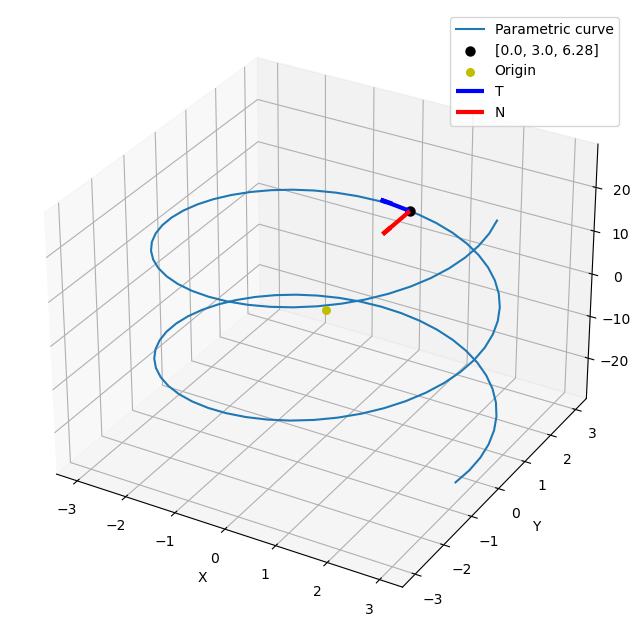

The point on the curve at the parameter value t= 1.5707963267948966 is P = [0.0, 3.0, 6.28]


In [3]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection = '3d')                 # Creates a 3d coordinate system

# Axis limitations (if needed) 
#ax.set_xlim3d([-2.5, 2.5])        
#ax.set_ylim3d([-2.5, 2.5])
#ax.set_zlim3d([-2, 1])

# Axis markings
ax.set_xlabel('X')                 
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Prepare a list of parameter values for curve plotting
t = np.linspace(-6.5, 6.5, 100)                         # Parameter range, spacing
 # COPY FROM INPUT HERE!!!:
P = [3*np.cos(t), 3*np.sin(t), 4*t]                     # Parametric curve:  FROM INPUT!
t0 = np.pi/2 
    
ax.plot(P[0], P[1], P[2], label='Parametric curve')     # Curve plotting
                                  
# Fixed point on the curve where parameter t = t0
t = t0                                                  # Fixed parameter value given in input.
# FILL FROM INPUT HERE!!! Obs! numpy np.cos here!
P = [round(3*np.cos(t), 2), round(3*np.sin(t), 2), round(4*t, 2)]   # Calculate fixed point

ax.scatter(P[0], P[1], P[2], color='k', linewidths=3, label = P)    # Point on the curve
ax.scatter(0,0,0, color='y', linewidths=2, label = 'Origin')        # Origin

# Extract scalar components from T0, N0, B0 for quiver plotting
P1 = C.origin.locate_new('P1', T0)
V1 = list(P1.express_coordinates(C))
P2 = C.origin.locate_new('P2', N0)
V2 = list(P2.express_coordinates(C))

# Plotting vectors T, N and B (start point, components )
quiver1 = ax.quiver(P[0], P[1], P[2],  V1[0],V1[1],V1[2],  color='b', linewidths=3, label = 'T')
quiver2 = ax.quiver(P[0], P[1], P[2],  V2[0],V2[1],V2[2],  color='r', linewidths=3, label = 'N')

ax.legend()
plt.show()
print('The point on the curve at the parameter value t=', t0, 'is P =', P)

In [4]:
print(T0.dot(B0))

0
